In [50]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
DATA_PATH = '.'

# Full code

## Plot in panel

In [51]:
def comparison_data(results, beta=0.02, gamma=0.02, epsilon=0.0001, x_axis='epsilon', y_axis='avg_qual'): 
    # x_axis & y_axis must match with results df column name!
    if x_axis=='epsilon':
        results_none  = results[(results['strategy']=='none') & (results['beta']==beta) & (results['gamma']== gamma)]
        results_hub  = results[(results['strategy']=='hub') & (results['beta']==beta) & (results['gamma']== gamma)]
    elif x_axis=='beta':
        results_none  = results[(results['strategy']=='none') & (results['epsilon']==epsilon) & (results['gamma']== gamma)]
        results_hub  = results[(results['strategy']=='hub') & (results['epsilon']==epsilon) & (results['gamma']== gamma)]
    elif x_axis=='gamma':
        results_none  = results[(results['strategy']=='none') & (results['epsilon']==epsilon) & (results['beta']== beta)]
        results_hub  = results[(results['strategy']=='hub') & (results['epsilon']==epsilon) & (results['beta']== beta)]
    return results_none, results_hub

def plot_single_comparison(ax, results, x_axis=None, y_axis=None):
    results_none, results_hub = comparison_data(results,  x_axis=x_axis, y_axis=y_axis)
#     print(results_none)
    ax.plot(results_none[x_axis], results_none[y_axis], label='none')
    ax.fill_between(results_none[x_axis], np.subtract(results_none[y_axis], results_none['qual_std']), np.add(results_none[y_axis], results_none['qual_std']), alpha=0.3)
    ax.plot(results_hub[x_axis], results_hub[y_axis], label='hub')
    ax.fill_between(results_none[x_axis], np.subtract(results_hub[y_axis], results_hub['qual_std']), np.add(results_hub[y_axis], results_hub['qual_std']), alpha=0.3)
    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)
    ax.legend()
    ax.set_title('With varying %s' %x_axis)

def plot_comparison(results, title='Compare strategies'):
    params = {'axes.labelsize': 13,'axes.titlesize':13, 'xtick.labelsize': 13, 'ytick.labelsize': 13}

    plt.rcParams.update(params)
    
    fig,axs = plt.subplots(1,3, sharey=True, figsize=(15,5))

    params = ['beta', 'gamma', 'epsilon']
    for ax,param in zip(axs,params):
        plot_single_comparison(ax, results, x_axis=param, y_axis='avg_qual')
    fig.suptitle(title, fontsize=15)
    fig.tight_layout()
    
    fig.show()

## 1 run

In [6]:
!pwd

/Users/baotruon/marketplace/exps


/var/folders/yc/9r4mxr9x4xjfl8r3q6jj171c0000gq/T/ipykernel_10936/2879064763.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


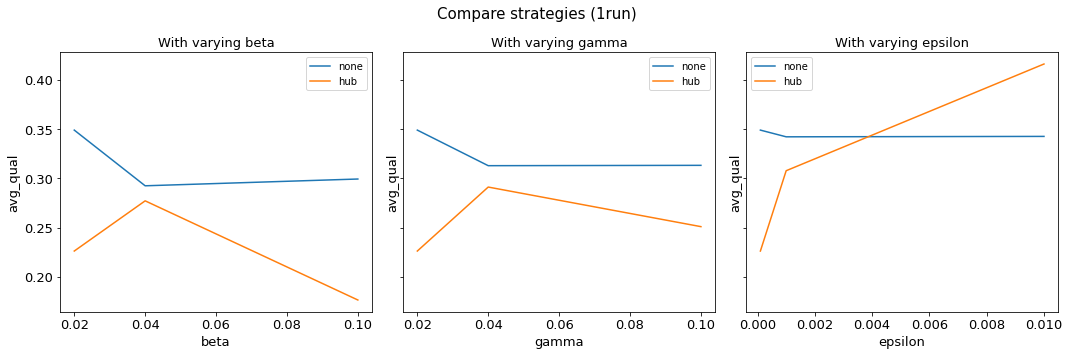

In [52]:
path = os.path.join(DATA_PATH, '08182022','syntheticnet_sim_results_1runs.csv')
results = pd.read_csv(path, sep='\t')
plot_comparison(results, title='Compare strategies (1run)')

## 10 runs

/var/folders/yc/9r4mxr9x4xjfl8r3q6jj171c0000gq/T/ipykernel_10936/2879064763.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


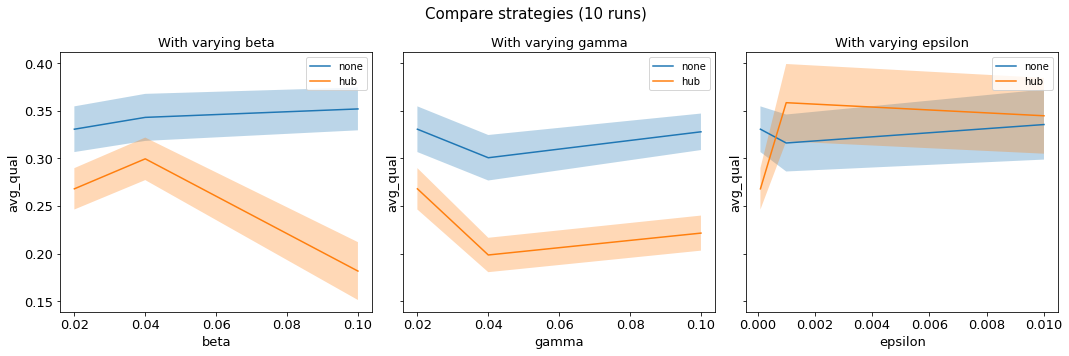

In [53]:
path = os.path.join(DATA_PATH, '08182022', 'syntheticnet_sim_results_10runs.csv')
results = pd.read_csv(path, sep='\t')
plot_comparison(results, title='Compare strategies (10 runs)')

/var/folders/yc/9r4mxr9x4xjfl8r3q6jj171c0000gq/T/ipykernel_10936/2879064763.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


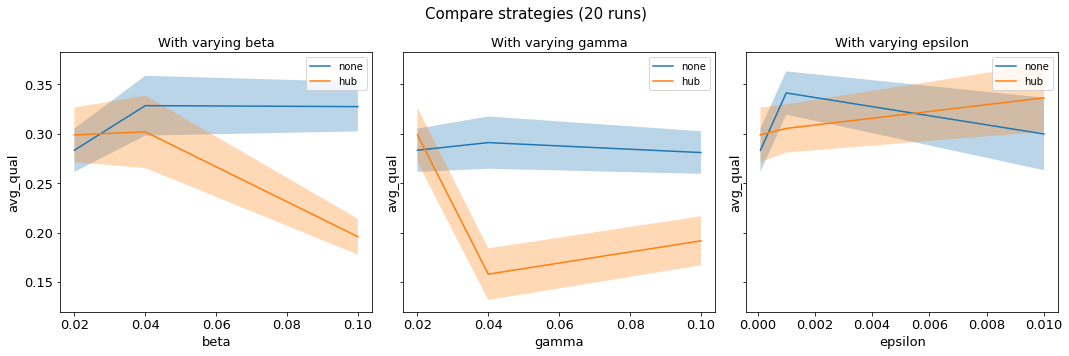

In [55]:
path = os.path.join(DATA_PATH, '08182022','syntheticnet_sim_results_20runs.csv')
results = pd.read_csv(path, sep='\t')
plot_comparison(results, title='Compare strategies (20 runs)')

# Debug

## 10 runs

In [2]:
results = results[['strategy','beta', 'gamma', 'epsilon', 'avg_qual', 'qual_std']]

NameError: name 'results' is not defined

In [ ]:
results.head()

In [7]:
beta=0.02
gamma=0.02
results_none  = results[(results['strategy']=='none') & (results['beta']==beta) & (results['gamma']== gamma)]
results_hub  = results[(results['strategy']=='hub') & (results['beta']==beta) & (results['gamma']== gamma)]

In [9]:
results_none

,strategy,beta,gamma,epsilon,avg_qual,qual_std
0,none,0.02,0.02,0.0100,0.999314,0.0
2,none,0.02,0.02,0.0010,0.999443,0.0
4,none,0.02,0.02,0.0001,0.446117,0.0


In [9]:
results_none = results_none.sort_values(by='epsilon')
results_hub = results_hub.sort_values(by='epsilon')

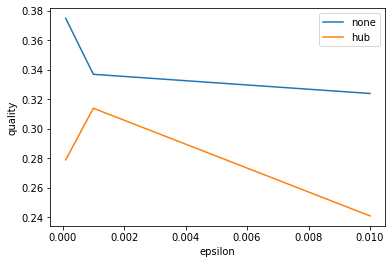

In [10]:
plt.plot(results_none['epsilon'], results_none['avg_qual'], label='none')
plt.plot(results_hub['epsilon'], results_hub['avg_qual'], label='hub')
plt.xlabel('epsilon')
plt.ylabel('quality')
plt.legend()

In [96]:
def get_plotting_data(df, strategy='none',  x_name='epsilon', y_name='avg_qual'):
    default_val = {'beta':0.04, 'gamma':0.04, 'epsilon':0.001}
    if x_name=='epsilon':
        #fix the other 2 dimension
        data = df[(df['strategy']==strategy) & (df['beta']==default_val['beta']) & (df['gamma']== default_val['gamma'])]
    elif x_name=='beta':
        data  = df[(df['strategy']==strategy) & (df['epsilon']==default_val['epsilon']) & (df['gamma']== default_val['gamma'])]
    elif x_name=='gamma':
        data  = df[(df['strategy']==strategy) & (df['epsilon']==default_val['epsilon']) & (df['beta']== default_val['beta'])]
    #sort values on x axis
    data = data.sort_values(by=x_name)
    x = data[x_name]
    y = data[y_name]
    std = data['qual_std']
#     print(data)
    return x,y,std

In [103]:
def draw_lines(ax, data, line_name='hub', x_axis='beta', y_axis='quality'):
    # Input: data=(x,y, err)
    # line_name=['hub', 'none']
    # plt.gca().set_prop_cycle(plt.rcParams["axes.prop_cycle"] + plt.cycler(marker=list('.s*o^v<>+x')))
    # markers=list('.s*o^v<>+x')
    # if log_x is True: ax.set_xscale('log')

    x, y, y_err = data
#     ax.plot(x,y, marker=markers[idx], label='')
    ax.plot(x,y)
    ax.fill_between(x, np.subtract(np.array(y), np.array(y_err)), np.add(np.array(y), np.array(y_err)), alpha=0.3)

#     ax.set_xlabel('x_axis')
#     ax.set_ylabel('y_axis')
#     ax.legend()
    
    return 

In [116]:
def plot_lines(ax, df, strategy='hub', x_axis='epsilon', y_axis='avg_qual'):
    data = get_plotting_data(df, strategy=strategy,  x_name=x_axis, y_name=y_axis)
    print(data)
    draw_lines(ax, data, line_name=strategy, x_axis=x_axis, y_axis=y_axis)

In [117]:
def plot_single_comparison(ax, df, x_axis='epsilon', y_axis='avg_qual'):
#     fig, ax = plt.subplots()
    plot_lines(ax, df, strategy='hub', x_axis=x_axis)
    plot_lines(ax, df, strategy='none', x_axis=x_axis)
    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)
#     plt.legend()
    plt.title('Compare strategy average quality with varying %s' %x_axis)
#     plt.show()

In [118]:
path = os.path.join(DATA_PATH, 'syntheticnet_sim_results_10runs.csv')
results = pd.read_csv(path, sep='\t')
results = results[['strategy','beta', 'gamma', 'epsilon', 'avg_qual', 'qual_std']]
# plot_comparison(results, title='Compare strategies (1run)')

(9     0.02
27    0.04
45    0.10
Name: beta, dtype: float64, 9     0.999362
27    0.999271
45    0.999222
Name: avg_qual, dtype: float64, 9     0.000000e+00
27    1.110223e-16
45    1.110223e-16
Name: qual_std, dtype: float64)
(8     0.02
26    0.04
44    0.10
Name: beta, dtype: float64, 8     0.999321
26    0.999322
44    0.999304
Name: avg_qual, dtype: float64, 8     1.110223e-16
26    0.000000e+00
44    1.110223e-16
Name: qual_std, dtype: float64)
(21    0.02
27    0.04
33    0.10
Name: gamma, dtype: float64, 21    0.999313
27    0.999271
33    0.999086
Name: avg_qual, dtype: float64, 21    0.000000e+00
27    1.110223e-16
33    1.110223e-16
Name: qual_std, dtype: float64)
(20    0.02
26    0.04
32    0.10
Name: gamma, dtype: float64, 20    0.999316
26    0.999322
32    0.999492
Name: avg_qual, dtype: float64, 20    0.0
26    0.0
32    0.0
Name: qual_std, dtype: float64)
(29    0.0001
27    0.0010
25    0.0100
Name: epsilon, dtype: float64, 29    0.315103
27    0.999271
25    0.9992

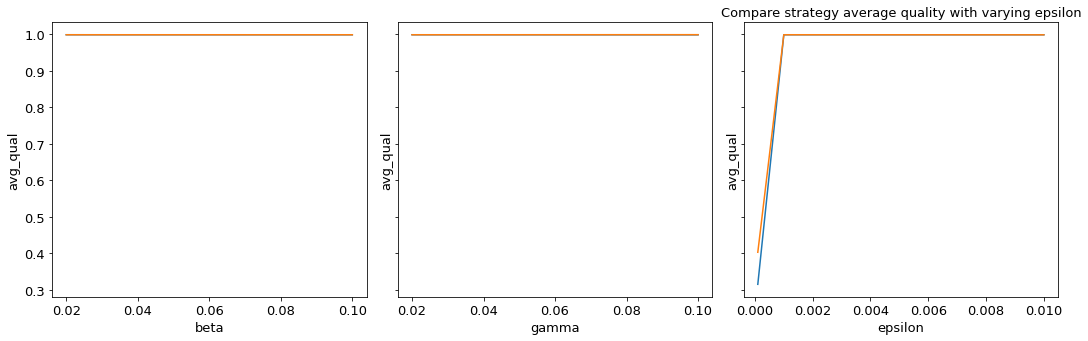

In [119]:
title=''

params = {'axes.labelsize': 13,'axes.titlesize':13, 'xtick.labelsize': 13, 'ytick.labelsize': 13}

plt.rcParams.update(params)

fig,axs = plt.subplots(1,3, sharey=True, figsize=(15,5))

params = ['beta', 'gamma', 'epsilon']
for ax,param in zip(axs,params):
    plot_single_comparison(ax, results, x_axis=param, y_axis='avg_qual')
fig.suptitle(title, fontsize=15)
fig.tight_layout()

In [57]:

path = os.path.join(DATA_PATH, 'syntheticnet_sim_results_20runs.csv')
results = pd.read_csv(path, sep='\t')

In [58]:
results.shape

(54, 7)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


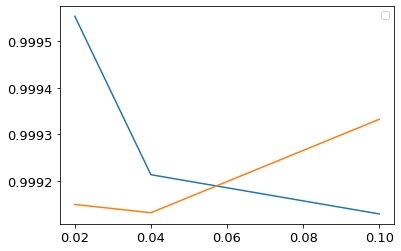

In [95]:
fig, ax = plt.subplots()
plot_lines(ax, results, strategy='hub', x_axis='gamma')
plot_lines(ax, results, strategy='none', x_axis='gamma')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


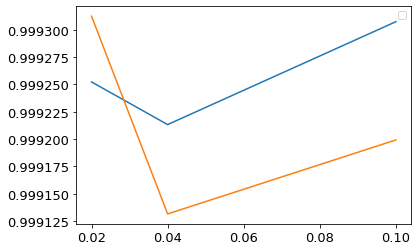

In [94]:
fig, ax = plt.subplots()
plot_lines(ax, results, strategy='hub', x_axis='beta')
plot_lines(ax, results, strategy='none', x_axis='beta')

In [ ]:
plot_comparison(results, title='Compare strategies')

In [61]:
def plot_comparison(results, title='Compare strategies'):
    params = {'axes.labelsize': 13,'axes.titlesize':13, 'xtick.labelsize': 13, 'ytick.labelsize': 13}

    plt.rcParams.update(params)
    
    fig,axs = plt.subplots(1,3, sharey=True, figsize=(15,5))

    params = ['beta', 'gamma', 'epsilon']
    for ax,param in zip(axs,params):
        plot_single_comparison(ax, results, x_axis=param, y_axis='avg_qual')
    fig.suptitle(title, fontsize=15)
    fig.tight_layout()
    
    fig.show()